In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas import json_normalize

Read our dataset.

In [2]:
df_audio_ft = pd.read_csv('df_audio_ft.csv')

In [3]:
len(df_audio_ft)

11869

In [4]:
df_audio_ft.head(3)

,track.name,song_id,name,id_x,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id_y,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,33xMbeHzmWd6Od0BmLZEUs,Nosaj Thing,0IVapwlnM3dEOiMsHXsghT,0.310,0.445,7,-13.355,0,0.0863,...,0.113,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,3UnyplmZaq547hwsfOR5yy,The Doors,22WZ7M8sxp5THdruNY3gXt,0.419,0.565,5,-11.565,1,0.0347,...,0.128,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,1w8QCSDH4QobcQeT4uMKLm,Radiohead,4Z8W4fKeB5YxbusRsdQVPb,0.354,0.302,9,-13.078,1,0.0326,...,0.111,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4


In [5]:
df_audio_ft.columns

Index(['track.name', 'song_id', 'name', 'id_x', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id_y',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [6]:
df_audio_ft['type'].value_counts()

audio_features    11869
Name: type, dtype: int64

In [7]:
df_audio_ft = df_audio_ft.drop(['id_y', 'type'], axis=1)

In [8]:
df_audio_ft = df_audio_ft.rename(columns={'track.name': 'track_name', 'name': 'artist_name', 'id_x': 'artist_id'})

In [9]:
df_audio_ft.columns

Index(['track_name', 'song_id', 'artist_name', 'artist_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

#### Scaling.

In [10]:
X = df_audio_ft.drop(['track_name', 'song_id', 'artist_name', 'artist_id', 'uri', 'track_href', 'analysis_url'], axis=1)

In [11]:
X.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.310,0.445,7,-13.355,0,0.0863,0.094,0.0678,0.113,0.122,95.360,152560,3
1,0.419,0.565,5,-11.565,1,0.0347,0.137,0.3370,0.128,0.648,151.277,197707,4
2,0.354,0.302,9,-13.078,1,0.0326,0.590,0.0709,0.111,0.223,123.753,244285,4


In [12]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000,1.186900e+04,11869.00000
mean,0.576681,0.624961,5.223018,-7.986699,0.631982,0.078908,0.280963,0.107458,0.191902,0.482683,120.018935,2.334646e+05,3.92156
std,0.159702,0.229983,3.610090,4.253265,0.482286,0.087975,0.310273,0.250542,0.161431,0.243681,28.540840,8.487520e+04,0.38531
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.240000e+03,0.00000
25%,0.471000,0.472000,2.000000,-9.702000,0.000000,0.034100,0.024000,0.000000,0.096900,0.290000,98.976000,1.920130e+05,4.00000
50%,0.586000,0.661000,5.000000,-7.062000,1.000000,0.045700,0.137000,0.000062,0.125000,0.471000,119.961000,2.224000e+05,4.00000
75%,0.690000,0.812000,8.000000,-5.157000,1.000000,0.078900,0.494000,0.018300,0.240000,0.675000,136.966000,2.590270e+05,4.00000
max,0.980000,0.998000,11.000000,-0.475000,1.000000,0.963000,0.996000,0.996000,0.997000,0.991000,239.964000,1.967427e+06,5.00000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

In [14]:
X_prep = scaler.transform(X)

In [15]:
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.669937,-0.782531,0.492247,-1.262213,-1.310443,0.084024,-0.602602,-0.158296,-0.488783,-1.480202,-0.864024,-0.953258,-2.391835
1,-0.987388,-0.260731,-0.061779,-0.841342,0.763100,-0.502532,-0.464009,0.916222,-0.395861,0.678445,1.095251,-0.421314,0.203584
2,-1.394413,-1.404342,1.046273,-1.197084,0.763100,-0.526403,0.996058,-0.145922,-0.501173,-1.065709,0.130838,0.127491,0.203584
3,0.941284,0.695901,-0.061779,0.300887,-1.310443,-0.211527,0.141935,0.074011,0.731602,1.958859,0.337428,0.194121,0.203584
4,-0.035576,0.430653,-1.446844,0.474879,0.763100,-0.601428,-0.831120,-0.416507,-0.619495,-0.400879,-0.114365,0.528509,0.203584


In [16]:
len(X_prep)

11869

#### Choosing k.

c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

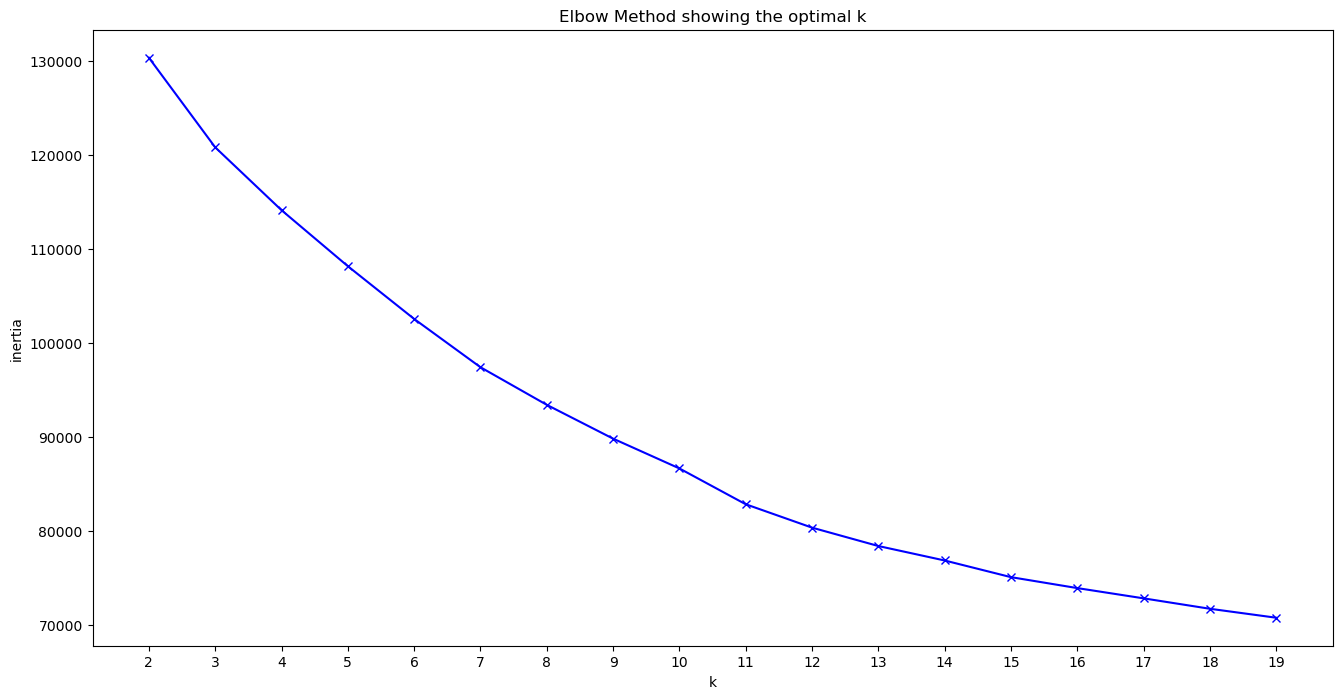

In [17]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

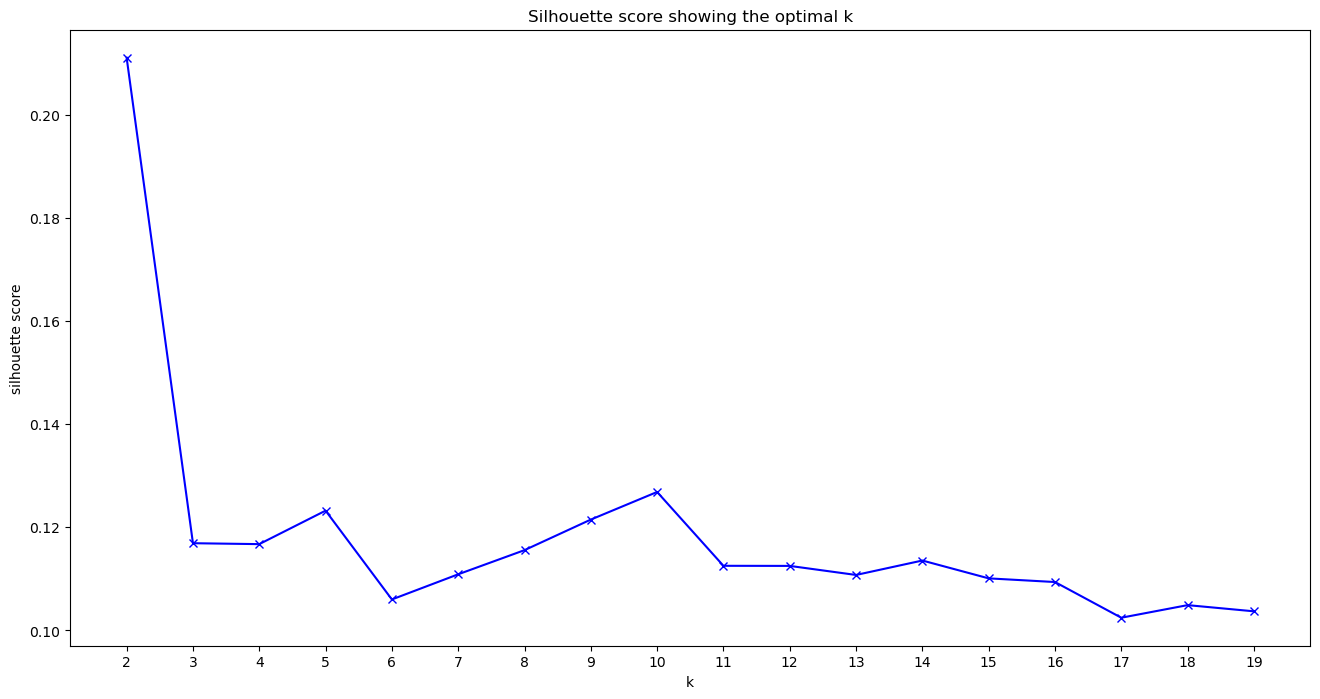

In [19]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

#### Clustering with k means.

In [64]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_prep)

c:\Users\dcast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [65]:
# Assigning the clusters:
clusters = kmeans.predict(X_prep)

In [66]:
pd.Series(clusters).value_counts().sort_index()

0    1469
1     208
2     616
3    1932
4    1882
5      91
6     715
7     664
8    2413
9    1879
dtype: int64

In [68]:
df_audio_ft_cl = df_audio_ft

In [69]:
df_audio_ft_cl['cluster'] = clusters

In [ ]:
# df_audio_ft_cl

In [55]:
# df_audio_ft_cl[df_audio_ft_cl['cluster'] == 4]

In [ ]:
# df_audio_ft_cl.to_csv('df_audio_ft_cl.csv')

# Gnod project | Part 5.

#### Authentication.

In [ ]:
secrets_file = open("Spotify.txt","r")

In [ ]:
string = secrets_file.read()

In [ ]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

#### Getting info for one song (the first on Spotify search).

In [ ]:
input_song = 'Angie'

In [ ]:
result = sp.search(q=input_song, limit=1)

In [ ]:
# result

In [ ]:
track = json_normalize(result["tracks"]["items"])

In [57]:
# track.columns

In [ ]:
track_audioft = sp.audio_features(track['id'])

In [ ]:
track_audioft_df = json_normalize(track_audioft)

In [ ]:
track_audioft_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.429,0.554,9,-6.128,0,0.0291,0.67,0.000152,0.105,0.407,136.302,audio_features,1GcVa4jFySlun4jLSuMhiq,spotify:track:1GcVa4jFySlun4jLSuMhiq,https://api.spotify.com/v1/tracks/1GcVa4jFySlu...,https://api.spotify.com/v1/audio-analysis/1GcV...,272000,4


In [ ]:
track_df = pd.merge(left=track,
                        right=track_audioft_df,
                        how='inner',
                        left_on='id',
                        right_on='id')

In [ ]:
track_df

,artists,available_markets,disc_number,duration_ms_x,explicit,href,id,is_local,name,popularity,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,272000,False,https://api.spotify.com/v1/tracks/1GcVa4jFySlu...,1GcVa4jFySlun4jLSuMhiq,False,Angie - Remastered 2009,74,...,0.000152,0.105,0.407,136.302,audio_features,spotify:track:1GcVa4jFySlun4jLSuMhiq,https://api.spotify.com/v1/tracks/1GcVa4jFySlu...,https://api.spotify.com/v1/audio-analysis/1GcV...,272000,4


#### Scaling and clustering.

In [ ]:
X_track = track_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms_x', 'time_signature']]

In [ ]:
X_track = X_track.rename(columns={'duration_ms_x': 'duration_ms'})

In [ ]:
X_track_prep = scaler.transform(X_track)

In [ ]:
cluster = kmeans.predict(X_track_prep)

In [ ]:
cluster

array([2])

In [58]:
# df_audio_ft_cl_filt = df_audio_ft_cl[df_audio_ft_cl['cluster']==cluster[0]].reset_index()

In [59]:
# ran = randint(0, len(df_audio_ft_cl_filt))
# df_audio_ft_cl_filt['track_name'][ran]

#### A function to do the clustering for a new song.

In [30]:
def user_track_cluster (song_name):
#Authentication
    secrets_file = open("Spotify.txt","r")
    string = secrets_file.read()
    secrets_dict={}
    for line in string.split('\n'):
        if len(line) > 0:
            secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                            client_secret=secrets_dict['clientsecret']))

# Getting track info
    result = sp.search(q=song_name, limit=1)
    track = json_normalize(result["tracks"]["items"])

# Getting track audio features.
    track_audioft = sp.audio_features(track['id'])
    track_audioft_df = json_normalize(track_audioft)

# Merging
    track_df = pd.merge(left=track, right=track_audioft_df, how='inner', left_on='id', right_on='id')

#Scaling
    X_track = track_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms_x', 'time_signature']]
    X_track = X_track.rename(columns={'duration_ms_x': 'duration_ms'})
    X_track_prep = scaler.transform(X_track)

#Clustering track
    cluster = kmeans.predict(X_track_prep)

    return cluster

#### Recommending.

In [28]:
hot = pd.read_csv('top100_popvortex_20230905.csv')

In [76]:
input_song = input('Enter a song name: ')
print('User input song: ', input_song)

from random import randint

if input_song in hot['title'].values:
    ran = randint(0,len(hot))
    print('You could try: ' + hot['title'][ran])
else:
    cluster = user_track_cluster(input_song)
    df_audio_ft_cl_filt = df_audio_ft_cl[df_audio_ft_cl['cluster']==cluster[0]].reset_index()
    ran = randint(0, len(df_audio_ft_cl_filt))
    track_name = df_audio_ft_cl_filt['track_name'][ran]
    track_uri = df_audio_ft_cl_filt['uri'][ran]
    print('You could try:', track_name, ',', 'uri:', track_uri)

User input song:  viva la vida
You could try: Please Don't Go , uri: spotify:track:3cNjgVBKTJ1SvKhunrCdVy


In [78]:
print('Input song cluster: ', cluster[0])
print('Recommended song cluster: ', df_audio_ft_cl[df_audio_ft_cl['track_name'] == track_name]['cluster'])

Input song cluster:  8
Recommended song cluster:  4310     8
11791    8
Name: cluster, dtype: int32


In [79]:
df_audio_ft_cl[df_audio_ft_cl['track_name'] == track_name]

,track_name,song_id,artist_name,artist_id,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,duration_ms,time_signature,cluster
4310,Please Don't Go,6jg5SRvdGxvJ0DzNV0UqEK,Mike Posner,2KsP6tYLJlTBvSUxnwlVWa,0.699,0.882,4,-3.896,0,0.0311,...,0.054400,0.130,0.657,120.016,spotify:track:6jg5SRvdGxvJ0DzNV0UqEK,https://api.spotify.com/v1/tracks/6jg5SRvdGxvJ...,https://api.spotify.com/v1/audio-analysis/6jg5...,196813,4,8
11791,Please Don't Go,3cNjgVBKTJ1SvKhunrCdVy,Joel Adams,36jaGQtMj5UWD0eO1fCVdD,0.513,0.768,4,-4.868,0,0.0587,...,0.000019,0.294,0.235,84.264,spotify:track:3cNjgVBKTJ1SvKhunrCdVy,https://api.spotify.com/v1/tracks/3cNjgVBKTJ1S...,https://api.spotify.com/v1/audio-analysis/3cNj...,210580,4,8
